MovieWriter imagemagick unavailable; using Pillow instead.


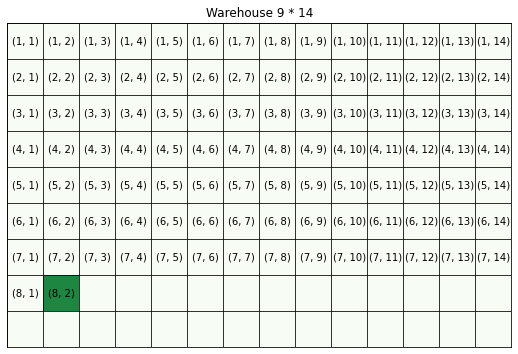

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.animation

#####################
# Array preparation
#####################

#input array
a = np.random.randint(70,150, size=(9,14))

# kernel
kernel = np.array([[ 0,-1, 0], [-1, 5,-1], [ 0,-1, 0]])

# visualization array (2 bigger in each direction)
va = np.zeros((a.shape[0]+2, a.shape[1]+2), dtype=int)
va[1:-1,1:-1] = a

#output array
res = np.zeros_like(a)

#colorarray
va_color = np.zeros((a.shape[0]+2, a.shape[1]+2)) 
va_color[1:-1,1:-1] = 0.5

#####################
# Create inital plot
#####################
fig = plt.figure(figsize=(10,6))

def add_axes_inches(fig, rect):
    w,h = fig.get_size_inches()
    return fig.add_axes([rect[0]/w, rect[1]/h, rect[2]/w, rect[3]/h])

axwidth = 7.
cellsize = axwidth/va.shape[1]
axheight = cellsize*va.shape[0]

ax_res = add_axes_inches(fig, [cellsize, cellsize, axwidth, axheight])
ax_res.set_title("Warehouse 9 * 14", size=12)

im_res = ax_res.imshow(res, vmin=0, vmax=1.3, cmap="Greens")
res_texts = []
for i in range(res.shape[0]):
    row = []
    for j in range(res.shape[1]):
        row.append(ax_res.text(j,i, "", va="center", ha="center"))
    res_texts.append(row)    


for ax  in [ax_res]:
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    ax.yaxis.set_major_locator(mticker.IndexLocator(1,0))
    ax.xaxis.set_major_locator(mticker.IndexLocator(1,0))
    ax.grid(color="k")

###############
# Animation
###############
def init():
    for row in res_texts:
        for text in row:
            text.set_text("")

def animate(ij):
    i,j=ij
    o = kernel.shape[1]//2
    # calculate result
    res_ij = i+1,j+1
    res_texts[i][j].set_text(res_ij)
    # make colors
    c = va_color.copy()
    c[1+i-o:1+i+o+1, 1+j-o:1+j+o+1] = 1.
    im_va.set_array(c)

    r = res.copy()
    r[i,j] = 1
    im_res.set_array(r)

i,j = np.indices(res.shape)
ani = matplotlib.animation.FuncAnimation(fig, animate, init_func=init, 
                                         frames=zip(i.flat, j.flat), interval=400)
ani.save("algo.gif", writer="imagemagick")
plt.show()